In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

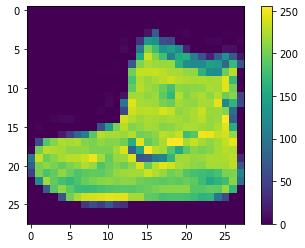

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# rescale to colors to make grayscale

train_images = train_images / 255
test_images = test_images / 255

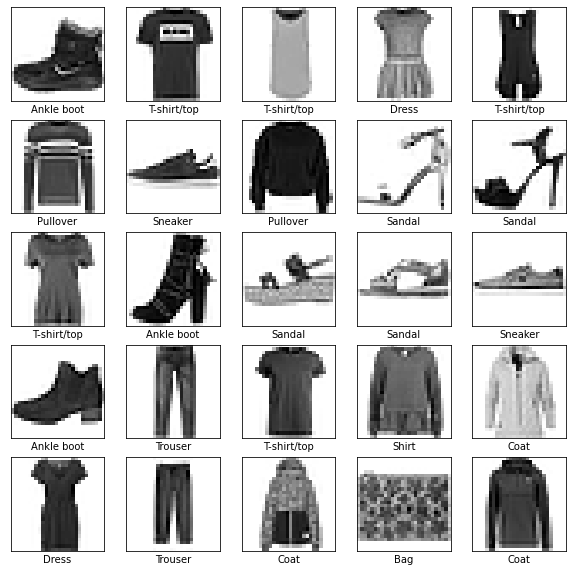

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# Sequential model representing a flattening layer (changes rows of pixels into 1D array), Dense layer (fully-connected),
# Output of scores from 1 to 10 representing the labels

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
# Fit model to training data
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4973 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3703 - accuracy: 0.8669
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3350 - accuracy: 0.8784
Epoch 4/10
60000/60000 [==============================] - ETA: 0s - loss: 0.3102 - accuracy: 0.88 - 5s 91us/sample - loss: 0.3102 - accuracy: 0.8865
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2943 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2674 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2555 - accuracy: 0.9055
Epoch 9/10
60000/60000 [==============================] - 5s 86us/sample - los

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2221 - accuracy: 0.8781

Test accuracy: 0.8781


In [19]:
probability_model = keras.Sequential([model,
                                     tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([2.8353691e-07, 5.0548249e-10, 4.3003173e-08, 2.2533545e-08,
       7.1210804e-10, 1.0901636e-03, 3.2666204e-08, 1.6391130e-02,
       2.5175675e-06, 9.8251581e-01], dtype=float32)

In [24]:
# maximum confidence
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(plt.cm.binary)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

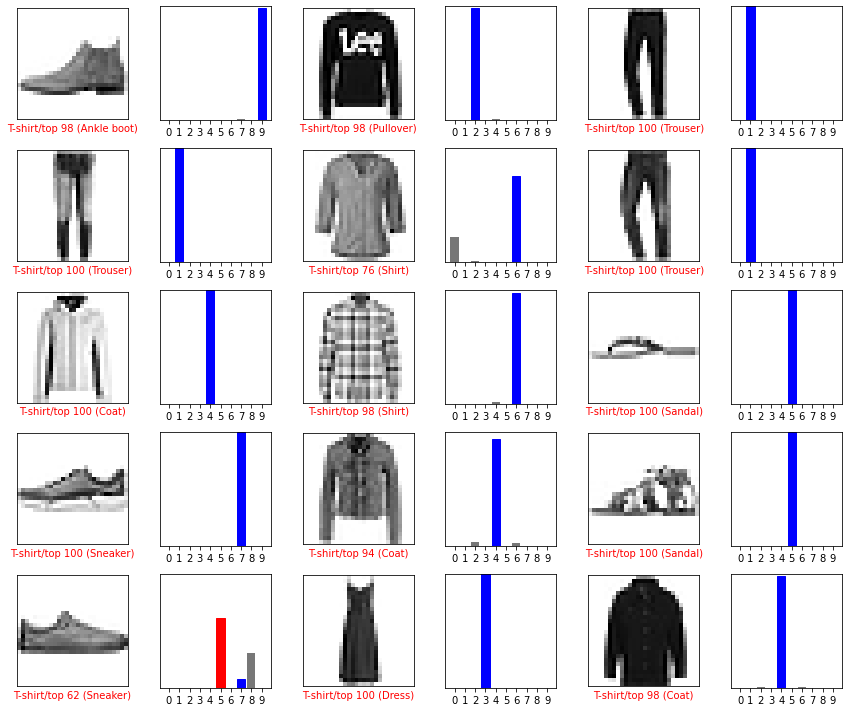

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()